In [1]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from IPython.core.display import display, HTML
import plotly.graph_objs as go
import plotly.tools as tls
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('/home/maison/Téléchargements/OD_2017-04v2.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,start_date,start_station_code,end_date,end_station_code,duration_sec,is_member,year,month,day,hour,day_of_week,qr_st,qr_en,arr_st,arr_en
0,0,0,2017-04-15 00:00,7060,2017-04-15 00:31,7060,1841,1,2017.0,4,15,0.0,5,Verdun-Centre,Verdun-Centre,Verdun,Verdun
1,1,1,2017-04-15 00:01,6173,2017-04-15 00:10,6173,553,1,2017.0,4,15,0.0,5,Parc-Lafontaine,Parc-Lafontaine,Le Plateau-Mont-Royal,Le Plateau-Mont-Royal
2,2,2,2017-04-15 00:01,6203,2017-04-15 00:04,6204,195,1,2017.0,4,15,0.0,5,Milton-Parc,Milton-Parc,Le Plateau-Mont-Royal,Le Plateau-Mont-Royal
3,3,3,2017-04-15 00:01,6104,2017-04-15 00:06,6114,285,1,2017.0,4,15,0.0,5,Sainte-Marie,Sainte-Marie,Ville-Marie,Ville-Marie
4,4,4,2017-04-15 00:01,6174,2017-04-15 00:11,6174,569,1,2017.0,4,15,0.0,5,Saint-Louis,Saint-Louis,Le Plateau-Mont-Royal,Le Plateau-Mont-Royal


In [47]:
idx = pd.DataFrame(df.groupby(['qr_st'])['qr_st'].count()).index
val = pd.DataFrame(df.groupby(['qr_st'])['qr_st'].count()).values

In [28]:
%%HTML
<iframe width= "100%" height = "600" src='image.html'></iframe>

In [3]:
lab = ['qr_st', 'qr_en']

idx_s = pd.DataFrame(df.groupby(lab[0])[lab[0]].count()).index
val_s = pd.DataFrame(df.groupby(lab[0])[lab[0]].count()).values
val_e = pd.DataFrame(df.groupby(lab[1])[lab[1]].count()).values


l = []
l.append(go.Scatter(x = list(np.arange(len(idx_s)))[0:1], y = list(val_s)[0:1]))
l.append(go.Bar(x = list(np.arange(len(idx_s)))[0:1], y = list(val_s)[0:1]))




lay = go.Layout(barmode='relative', yaxis = dict(range= np.arange(0,9000)))

fig = go.Figure(data=l, layout=lay)
plot(fig, filename='bar1.html',auto_open=False)

'file:///home/maison/bar1.html'

In [4]:
%%HTML
<iframe width= "100%" height = "1000" src='bar1.html'></iframe>

In [17]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.offline as py
import json

stations=json.load(open('/home/maison/Téléchargements/stations.json'))
fig= plt.figure(figsize=(10,10))
G2 = nx.Graph()

for x in range(len(stations['stations'])):
    s = stations['stations'][x]
    G2.add_node(s['n'], pos=(s['lo'],s['la']))
    
pos = nx.get_node_attributes(G2,'pos')
nx.draw(G2, pos, node_size=10, node_color='k')

plot_url = py.plot_mpl(fig)

/home/maison/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning:

pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.

/home/maison/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning:

pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.

/home/maison/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:917: UserWarning:

axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.

/home/maison/anaconda3/lib/python3.6/site-packages/matplotlib/rcsetup.py:152: UserWarning:

axes.hold is deprecated, will be removed in 3.0



In [114]:
idx_s

Index(['Crémazie', 'Côte-Saint-Antoine', 'Côte-Saint-Paul',
       'Desmarchais-Crawford', 'François-Perrault', 'Gabriel-Sagard',
       'Hochelaga', 'Ile-des-Soeurs', 'Longue-Pointe', 'Lorimier',
       'Louis-Hébert', 'Louis-Riel', 'Loyola', 'Maisonneuve', 'Marie-Victorin',
       'Mile End', 'Milton-Parc', 'Montagne', 'Nicolas-Viel', 'Outremont',
       'Parc-Extension', 'Parc-Jarry', 'Parc-Kent', 'Parc-Lafontaine',
       'Parc-Laurier', 'Petite-Bourgogne', 'Petite-Côte',
       'Pointe-Saint-Charles', 'Préfontaine', 'Père-Marquette',
       'René-Lévesque', 'Saint-Henri', 'Saint-Louis', 'Saint-Sulpice',
       'Saint-Édouard', 'Sainte-Lucie', 'Sainte-Marie', 'Sault-au-Récollet',
       'Savane', 'Snowdon', 'Upper Lachine', 'Verdun-Centre', 'Vieux-Montréal',
       'Vieux-Rosemont', 'Ville-Émard', 'Westmount', 'Édouard-Montpetit',
       'Étienne Desmarteaux'],
      dtype='object', name='qr_st')

In [22]:
import pandas as pd
df1 = pd.read_csv('/home/maison/Téléchargements/OD_2017-04v2.csv')
df2 = pd.DataFrame(df1.groupby(by=['start_station_code','end_station_code'])['end_station_code'].count())
fig = plt.figure(figsize=(10,10))
G4 = nx.Graph()
for x in range(len(stations['stations'])):
    s = stations['stations'][x]
    G4.add_node(s['n'], pos=(s['lo'],s['la']))

pos = nx.get_node_attributes(G4,'pos')

nx.draw_networkx_nodes(
    G4, pos, node_size=30, node_color='r', alpha=0.5)

l = []
for x in range(len(df2)):
    l.append(
        (
            str(df2.iloc[x].name[0]),
            str(df2.iloc[x].name[1]),
            int(df2.iloc[x])
        )
    )


G4.add_weighted_edges_from(l)
G4.remove_nodes_from(['6269','7022', '7062','6164','6355',
                     '6903','6355', '6903', '6280','6231',
                     '6748','6925'])



edges,weights = zip(*nx.get_edge_attributes(G4,
                        'weight').items())

nx.draw_networkx_edges(G4,pos,
    edgelist=edges, edge_color='k',alpha=1
)
plot_url = py.plot_mpl(fig)

/home/maison/anaconda3/lib/python3.6/site-packages/plotly/matplotlylib/renderer.py:445: UserWarning:

Dang! That path collection is out of this world. I totally don't know what to do with it yet! Plotly can only import path collections linked to 'data' coordinates



In [24]:
import qgrid

ModuleNotFoundError: No module named 'qgrid'

In [141]:
range(len(idx))[0]

0

In [172]:
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [174]:
np.random.randn(10)

array([-2.18559382,  1.22766235, -0.32011824,  0.13404425, -0.25442147,
        1.94133529,  1.76235189,  1.60094529,  2.07693228, -0.57101696])

In [180]:
val_s

array([[ 2491],
       [ 1394],
       [  542],
       [  538],
       [   55],
       [  701],
       [  726],
       [  391],
       [  305],
       [ 9358],
       [ 2805],
       [   48],
       [  259],
       [ 2248],
       [  837],
       [12386],
       [10717],
       [ 5563],
       [  143],
       [ 2694],
       [  415],
       [ 2796],
       [  674],
       [12580],
       [15920],
       [ 3193],
       [ 1848],
       [ 2646],
       [ 2125],
       [ 4704],
       [30694],
       [ 2876],
       [15139],
       [  368],
       [ 6633],
       [  102],
       [10289],
       [  665],
       [  184],
       [  250],
       [  918],
       [ 1968],
       [11664],
       [ 2813],
       [  501],
       [ 1906],
       [ 2863],
       [ 1293]])

In [481]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.tools as tls

/home/maison/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:524: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



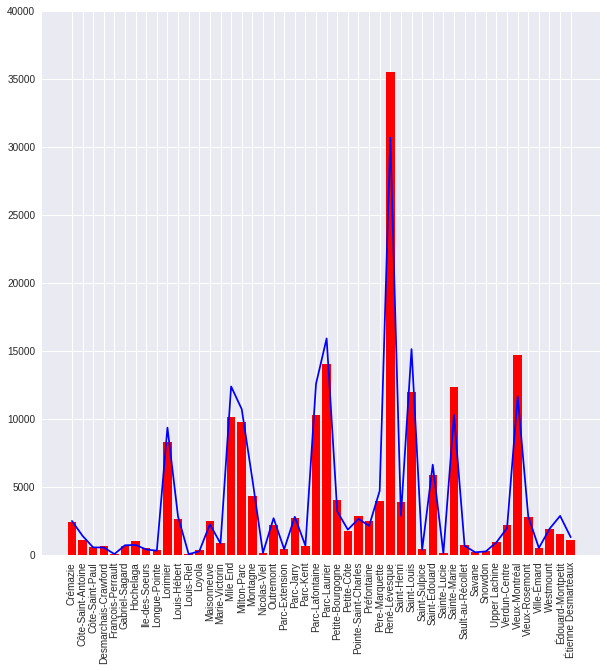

In [715]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.set_ylim(0,40000)

ax.plot(np.arange(len(idx_s)), list(val_s), color='b', label = list(idx_s))
plt.xticks(range(len(idx_s)), list(idx_s),rotation='vertical')
plt.bar(np.arange(len(idx_s)), list(val_e), label = list(idx_s), color='r')
sns.despine()
fig
#df1

In [716]:
import plotly.offline as py
d = tls.mpl_to_plotly(fig)
d['layout']['xaxis1'].update({'ticktext': list(idx_s), 'tickvals' : np.arange(len(idx_s))})
plot_url = py.plot(d, filename='name.html', auto_open=False)

In [717]:
%%HTML
<iframe width= "75%" height = "760" src='name.html'></iframe>

In [630]:
def pretty_pd(df):
    return pd.DataFrame(df).style.set_table_styles(
        [
         {'selector' : 'tr:nth-child(even)',
        'props' : [('background-color', '#d3d3d3')]},
        {'selector' : 'tr:hover',
         'props' : [('background-color','#a8a8a8')]},
        {'selector' : 'td:hover',
         'props' : [('background-color','#a8a8a8')]},  
        {'selector' : 'tr:hover td:hover',
         'props' : [('background-color','#939393')]},
        {'selector' : 'td',
        'props' : [('border-bottom', '5px solid #e4e4e4')]}])

In [632]:
pretty_pd(df.head())

In [292]:
pd.set_option('display.max_colwidth', 5)
pd.set_option('display.max_columns', 12)
pd.set_option('display.notebook_repr_html', True)

df.head()

,Unnamed: 0,Unnamed: 0.1,start_date,start_station_code,end_date,end_station_code,...,hour,day_of_week,qr_st,qr_en,arr_st,arr_en
0,0,0,2...,7060,2...,7060,...,0.0,5,V...,V...,V...,V...
1,1,1,2...,6173,2...,6173,...,0.0,5,P...,P...,L...,L...
2,2,2,2...,6203,2...,6204,...,0.0,5,M...,M...,L...,L...
3,3,3,2...,6104,2...,6114,...,0.0,5,S...,S...,V...,V...
4,4,4,2...,6174,2...,6174,...,0.0,5,S...,S...,L...,L...


pandas.formats.style.Styler

In [706]:
pd.DataFrame(df.groupby('qr_st')['qr_st'].count()).values.sum()

192228

In [713]:
pd.DataFrame(df.groupby('qr_en')['qr_en'].count()).index

Index(['Crémazie', 'Côte-Saint-Antoine', 'Côte-Saint-Paul',
       'Desmarchais-Crawford', 'François-Perrault', 'Gabriel-Sagard',
       'Hochelaga', 'Ile-des-Soeurs', 'Longue-Pointe', 'Lorimier',
       'Louis-Hébert', 'Louis-Riel', 'Loyola', 'Maisonneuve', 'Marie-Victorin',
       'Mile End', 'Milton-Parc', 'Montagne', 'Nicolas-Viel', 'Outremont',
       'Parc-Extension', 'Parc-Jarry', 'Parc-Kent', 'Parc-Lafontaine',
       'Parc-Laurier', 'Petite-Bourgogne', 'Petite-Côte',
       'Pointe-Saint-Charles', 'Préfontaine', 'Père-Marquette',
       'René-Lévesque', 'Saint-Henri', 'Saint-Louis', 'Saint-Sulpice',
       'Saint-Édouard', 'Sainte-Lucie', 'Sainte-Marie', 'Sault-au-Récollet',
       'Savane', 'Snowdon', 'Upper Lachine', 'Verdun-Centre', 'Vieux-Montréal',
       'Vieux-Rosemont', 'Ville-Émard', 'Westmount', 'Édouard-Montpetit',
       'Étienne Desmarteaux'],
      dtype='object', name='qr_en')

In [721]:
init_notebook_mode(connected=True)
plot([{'x' : np.arange(len(df)), 'y' : df['duration_sec']}],filename='image1.html',auto_open=False,)

'file:///home/maison/image1.html'

In [722]:
%%HTML
<iframe width= "75%" height = "760" src='image1.html'></iframe>

In [748]:
fig = plt.figure(figsize=(10,10))
sns.distplot(df[df['is_member']==1]['duration_sec'])
sns.distplot(df[df['is_member']==0]['duration_sec'], color='r')
sns.distplot(df[df['start_station_code']==df['end_station_code']]['duration_sec'], color='g')

py.plot_mpl(fig, filename='distplot.html', auto_open=False)


/home/maison/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning:

using a non-integer number instead of an integer will result in an error in the future



'file:///home/maison/distplot.html'

In [749]:
%%HTML
<iframe width= "75%" height = "760" src='distplot.html'></iframe>